# Data Exploration

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]

In [93]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from src.config import chemical_inventory_path, raw_data_path


In [2]:
%cd ..

/home/belu/VS Workplace/2021-re-pendleton-perovskite


In [154]:
import src.data.notebook_utils as utils

df = utils.read_data(raw_data_path)
columns = utils.get_columns(df.columns)

In [121]:
columns.keys()

dict_keys(['_rxn_', '_feat_', '_raw', 'solUD', 'solV', 'chem'])

## Numerical data: distribution

### Reaction features

In [122]:
cols = list(columns['_rxn_'])



In [97]:
fig = make_subplots(rows=len(cols), cols=1, subplot_titles=cols)

for index, col in enumerate(cols):
    plot = go.Histogram(y=df[col])
    fig.append_trace(plot, row=index+1, col=1)

fig.update_layout(height=1800, width=600, title_text="Histograma: condiciones de reacción", showlegend=False)
fig.update_layout(title={
                'x':0.6,
                'xanchor': 'center',
                'yanchor': 'top'})
fig.show()

### Based on organic compound: inchikeys

In [140]:
chemical_names = utils.read_chemical_info()

In [124]:
chemical_names.head()

,Chemical Name,Chemical Abbreviation,Molecular Weight (g/mol),Density (g/mL),InChI=,InChI Key (ID),Chemical Category,Canonical SMILES String,Molecular Formula,PubChem ID,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gamma-Butyrolactone,GBL,86.09,1.12,InChI=1S/C4H6O2/c5-4-2-1-3-6-4/h1-3H2,YEJRWHAVMIAJKC-UHFFFAOYSA-N,solvent,C1CC(=O)OC1,C4H6O2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dimethyl sulfoxide,DMSO,78.13,1.10,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,solvent,CS(=O)C,C2H6OS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Formic Acid,FAH,46.03,1.22,"InChI=1S/CH2O2/c2-1-3/h1H,(H,2,3)",BDAGIHXWWSANSR-UHFFFAOYSA-N,acid,C(=O)O,CH2O2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lead Diiodide,PbI2,461.01,6.16,InChI=1S/2HI.Pb/h2*1H;/q;;+2/p-2,RQQRAHKHDFPBMC-UHFFFAOYSA-L,inorganic,I[Pb]I,PbI2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
chemical_names[['Chemical Abbreviation', 'InChI Key (ID)']].dropna()
df = df.set_index('_rxn_organic-inchikey').join(chemical_names.set_index('InChI Key (ID)'), how='inner').reset_index().rename({'index': '_rxn_organic-inchikey'}, axis='columns')


<AxesSubplot:xlabel='Reactivo', ylabel='Cantidad de filas'>

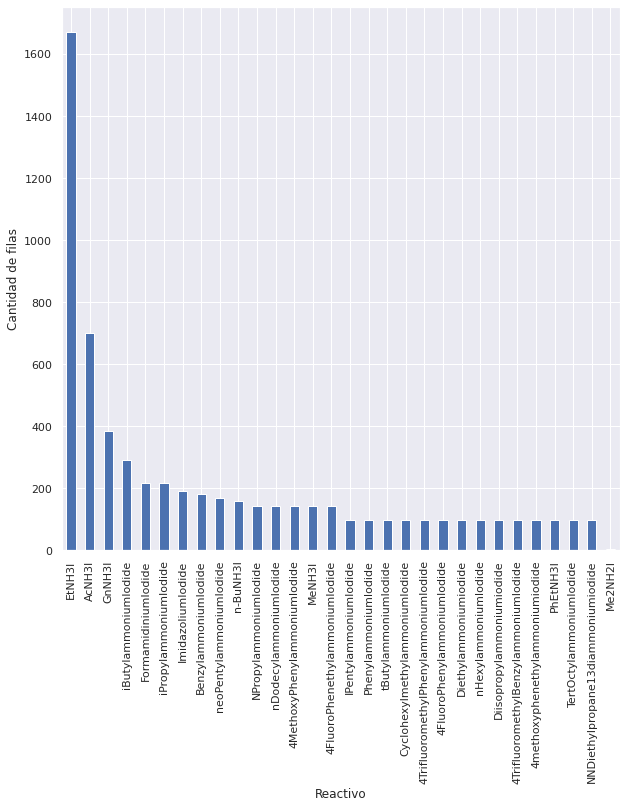

In [101]:
df['Chemical Abbreviation'].value_counts().plot(kind='bar', ylabel='Cantidad de filas', xlabel='Reactivo')

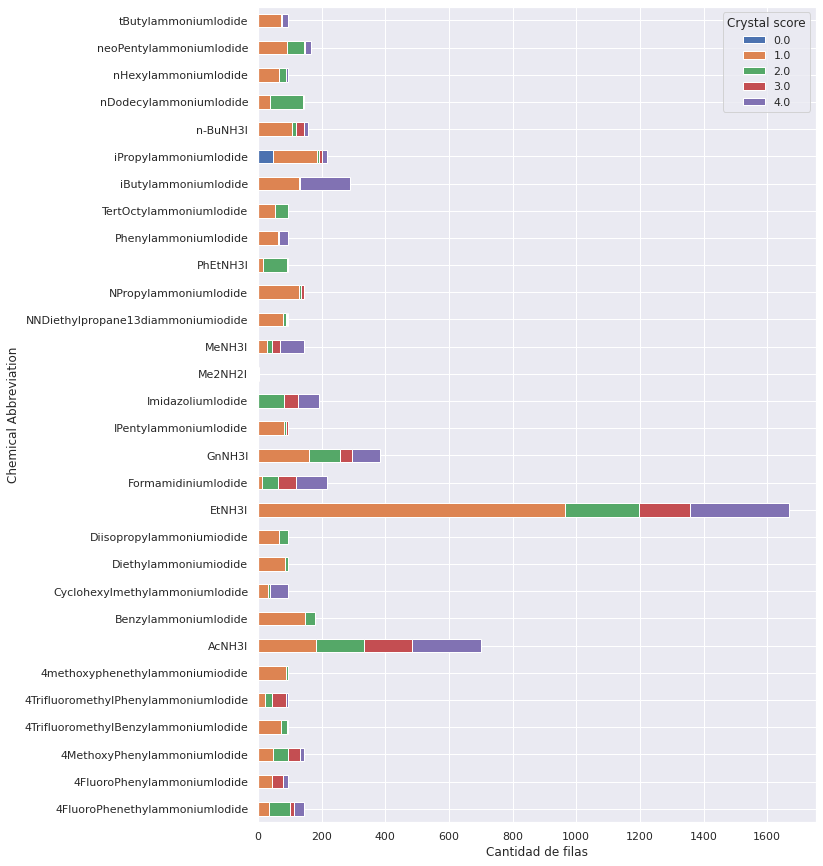

In [102]:
df_groupedby_inchi = df.groupby(by=['Chemical Abbreviation', '_out_crystalscore'])
ax = df_groupedby_inchi.size().unstack().plot.barh(stacked=True, figsize=(10,15), label='Crystal Score')

ax.set_xlabel('Cantidad de filas')
ax.legend(title='Crystal score')
#plot(kind='bar', ylabel='Cantidad de filas', xlabel='Reactivo', fontsize=9, figsize=(20,7))

In [70]:
df_groupedby_inchi.count().head()

index  Unnamed: 0  dataset  \
Chemical Abbreviation          _out_crystalscore                               
4FluoroPhenethylammoniumIodide 1.0                   31          31       31   
                               2.0                   54          54       54   
                               3.0                   12          12       12   
                               4.0                   25          25       25   
4FluoroPhenylammoniumIodide    1.0                   30          30       30   

                                                  name  _raw_v0-M_acid  \
Chemical Abbreviation          _out_crystalscore                         
4FluoroPhenethylammoniumIodide 1.0                  31              31   
                               2.0                  54              54   
                               3.0                  12              12   
                               4.0                  25              25   
4FluoroPhenylammoniumIodide    1.0                  30              30   

                                                  _raw_v0-M_inorganic  \
Chemical Abbreviation          _out_crystalscore                        
4FluoroPhenethylammoniumIodide 1.0                                 31   
                               2.0                                 54   
                               3.0                                 12   
                               4.0                                 25   
4FluoroPhenylammoniumIodide    1.0                                 30   

                                                  _raw_v0-M_organic  \
Chemical Abbreviation          _out_crystalscore                      
4FluoroPhenethylammoniumIodide 1.0                               31   
                               2.0                               54   
                               3.0                               12   
                               4.0                               25   
4FluoroPhenylammoniumIodide    1.0                               30   

                                                  _rxn_M_acid  \
Chemical Abbreviation          _out_crystalscore                
4FluoroPhenethylammoniumIodide 1.0                         31   
                               2.0                         54   
                               3.0                         12   
                               4.0                         25   
4FluoroPhenylammoniumIodide    1.0                         30   

                                                  _rxn_M_inorganic  \
Chemical Abbreviation          _out_crystalscore                     
4FluoroPhenethylammoniumIodide 1.0                              31   
                               2.0                              54   
                               3.0                              12   
                               4.0                              25   
4FluoroPhenylammoniumIodide    1.0                              30   

                                                  _rxn_M_organic  ...  \
Chemical Abbreviation          _out_crystalscore                  ...   
4FluoroPhenethylammoniumIodide 1.0                            31  ...   
                               2.0                            54  ...   
                               3.0                            12  ...   
                               4.0                            25  ...   
4FluoroPhenylammoniumIodide    1.0                            30  ...   

                                                  Unnamed: 24  Unnamed: 25  \
Chemical Abbreviation          _out_crystalscore                             
4FluoroPhenethylammoniumIodide 1.0                          0            0   
                               2.0                          0            0   
                               3.0                          0            0   
                               4.0                          0            0   
4FluoroPhenylammoniumIodide    1.

In [72]:
group_count = df_groupedby_inchi.count()

Analize if we take only a sample of EtNH3I

In [107]:
chemical_names.loc[chemical_names['Chemical Abbreviation'] == 'EtNH3I']['InChI Key (ID)']


5    XFYICZOIWSBQSK-UHFFFAOYSA-N
Name: InChI Key (ID), dtype: object

In [126]:
len(df)

6241

In [159]:
filtered_df = df.drop(df.loc[df['_rxn_organic-inchikey'] == 'XFYICZOIWSBQSK-UHFFFAOYSA-N'].index)

In [160]:
len(filtered_df)

4572

In [163]:
def plot(dfs, cols):
    fig = make_subplots(rows=len(cols), cols=1, subplot_titles=cols)

    for index, col in enumerate(cols):
        plot = go.Histogram(y=dfs[col])
        fig.append_trace(plot, row=index+1, col=1)

    fig.update_layout(height=1800, width=600, title_text="Histograma: condiciones de reacción", showlegend=False)
    fig.update_layout(title={
                    'x':0.6,
                    'xanchor': 'center',
                    'yanchor': 'top'})
    fig.show()

In [164]:
plot(filtered_df, cols)